1. Feature distributions

In [ ]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data
from google.colab import files
files.upload()  # Upload the kaggle.json file

# Make sure kaggle.json is in the location ~/.kaggle/kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

# Unzip the dataset (if it's zipped)
!unzip new-york-city-airbnb-open-data.zip

# Now you can load the dataset
data = pd.read_csv('AB_NYC_2019.csv')

Saving AB_NYC_2019.csv to AB_NYC_2019 (2).csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open new-york-city-airbnb-open-data.zip, new-york-city-airbnb-open-data.zip.zip or new-york-city-airbnb-open-data.zip.ZIP.


In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# dataset information
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<ipython-input-51-d552c4718dbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


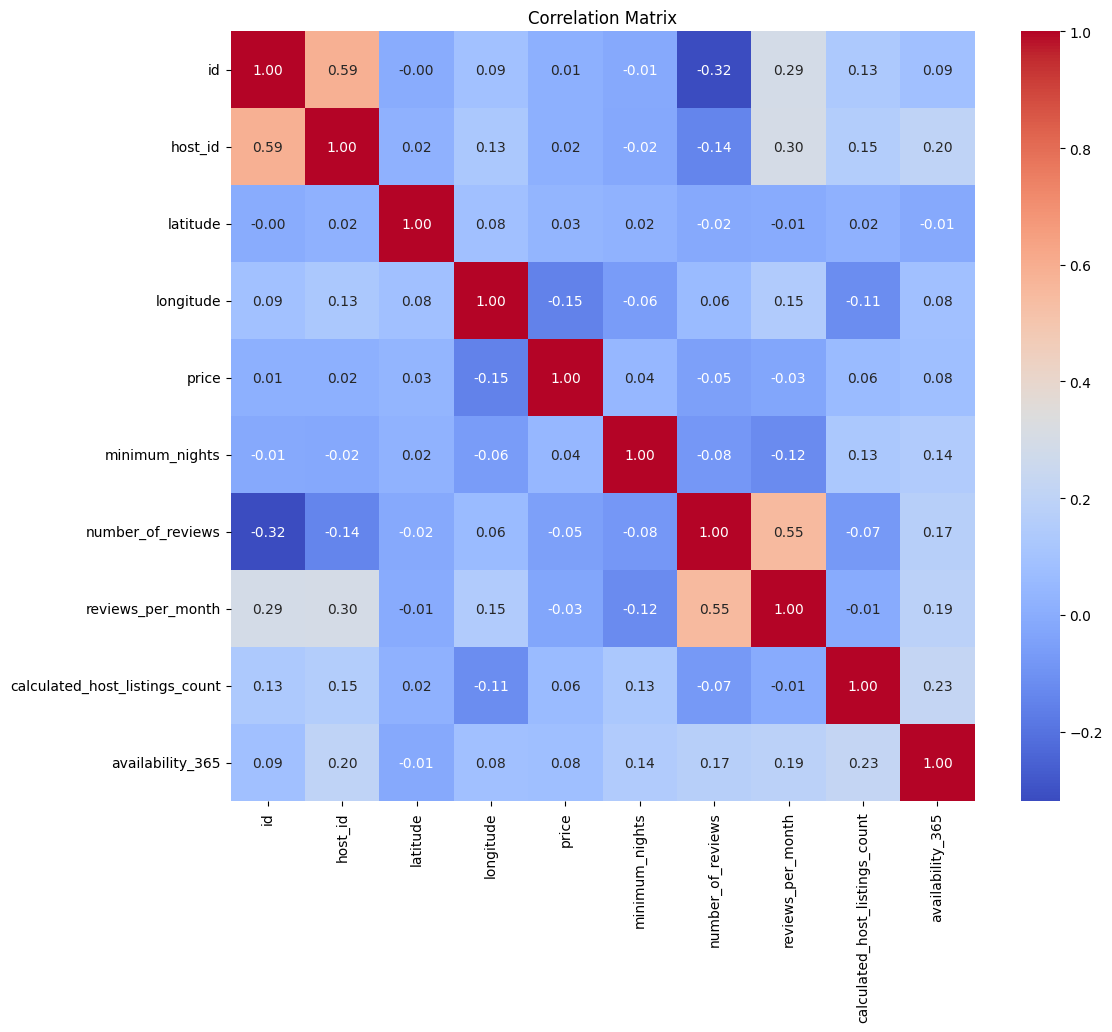

In [ ]:
# Overall heatmap to check correlation - YX
corr = data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

The id and host_id exhibit a moderate positive correlation (correlation=0.59): specific hosts may indeed own multiple listings.

There's a slight negative correlation between price and longitude (correlation =-0.15): a minor downward trend in rent prices as longitude increases within the geographical area.

The significant positive correlation between number_of_reviews and reviews_per_month (correlation=0.55): properties receiving more reviews tend to have higher monthly review rates.

The notable negative correlation between number_of_reviews and id (correlation =-0.32): newly added listings (i.e., those with higher ID numbers) have yet to accumulate a substantial number of reviews.

The positive correlation between calculated_host_listings_count and availability_365 (correlation=0.23): hosts with more listings tend to offer more available days for booking.

Apart from these relationships, most variables exhibit weak correlations, suggesting either no direct linear relationships or that these variables do not directly influence each other.

1. features distribution

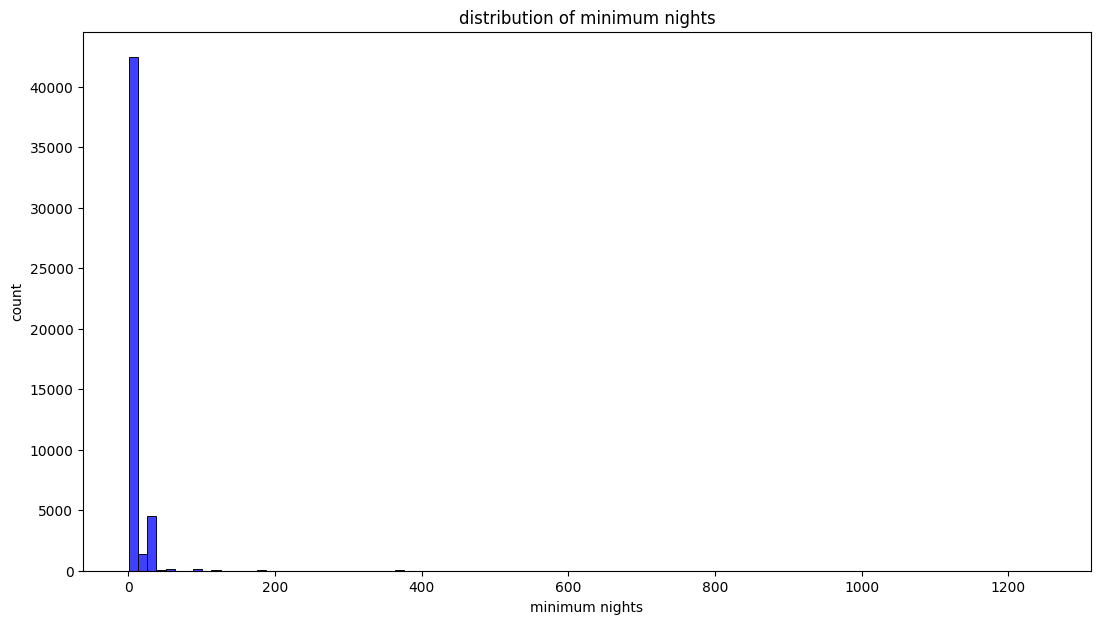

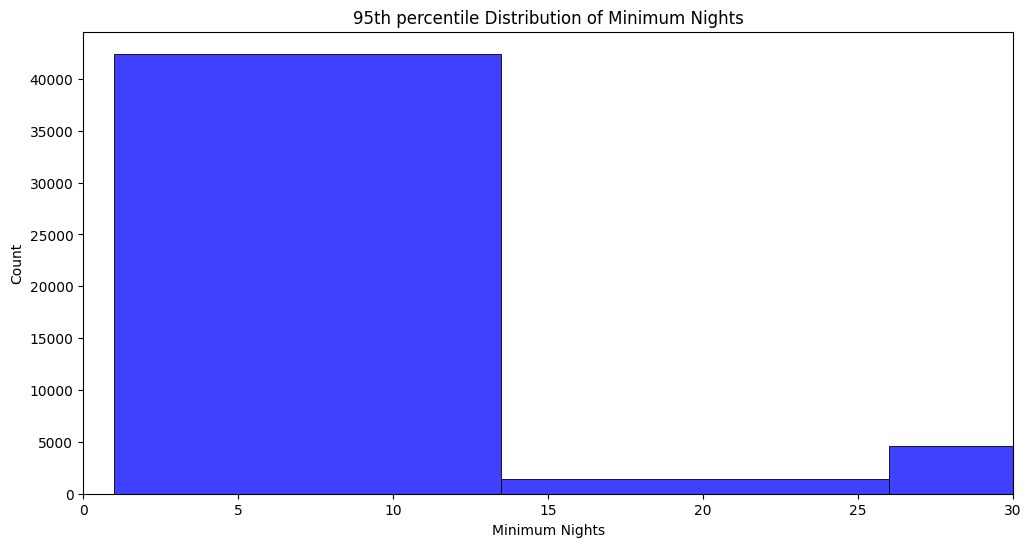

In [ ]:
# Yuan Xu
# Plot the distribution of min nights
plt.figure(figsize=(13,7))
ax= sns.histplot(data['minimum_nights'], bins = 100, kde = False, color = 'blue')
plt.title('distribution of minimum nights')
plt.xlabel('minimum nights')
plt.ylabel('count')

# distribution of min nights
plt.figure(figsize=(12, 6))
sns.histplot(data['minimum_nights'], bins=100, kde=False, color='blue')
plt.title('95th percentile Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.xlim(0, data['minimum_nights'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

Overall Distribution:

The distribution of minimum_nights is heavily right-skewed, indicating that most listings require only a small number of nights as the minimum stay.
There are a few listings with an extremely high minimum number of nights, which contribute to the long tail of the distribution. These could be outliers or special cases within the dataset, such as listings for long-term stays.

Focused Distribution:

When focusing on the 95th percentile, the histogram shows that an overwhelming majority of listings have a minimum_nights requirement of 30 days or less.
The mode of the distribution is at 1 night, which is the most common minimum stay requirement among the listings.
There's a visible decrease in frequency as the minimum number of nights increases, with very few listings requiring more than a few days to a week.

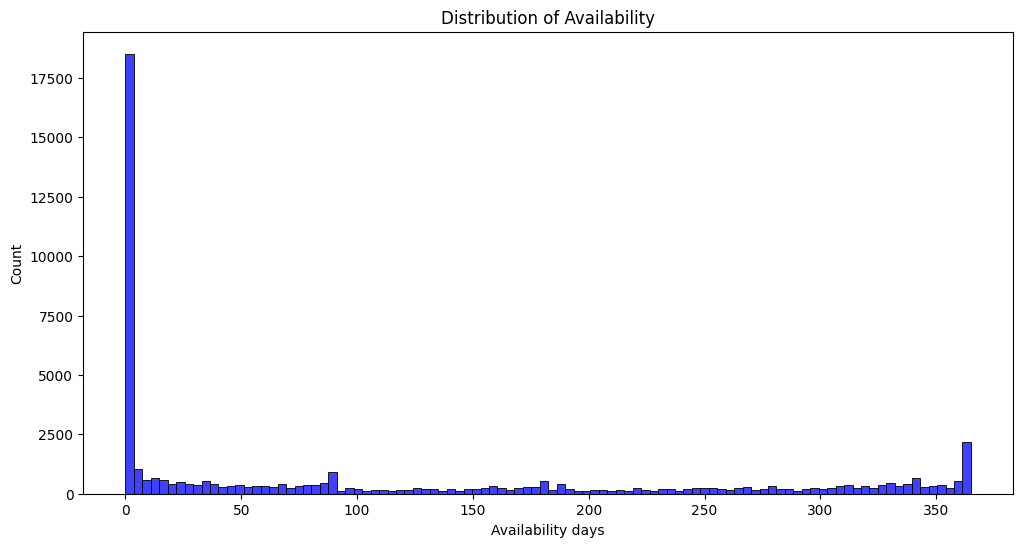

In [ ]:
# distribution of availability
plt.figure(figsize=(12, 6))
sns.histplot(data['availability_365'], bins=100, kde=False, color='blue')
plt.title('Distribution of Availability')
plt.xlabel('Availability days')
plt.ylabel('Count')
plt.show()

A highly skewed distribution, with a significant concentration of listings available for very few days within the year. Conversely, there's a small peak towards the full availability of 365 days. This bi-modal distribution could imply a segmentation within the market, with one large group of listings catering to short-term stays and another to long-term or permanent availability.

Correlation between price and min nigths and available days

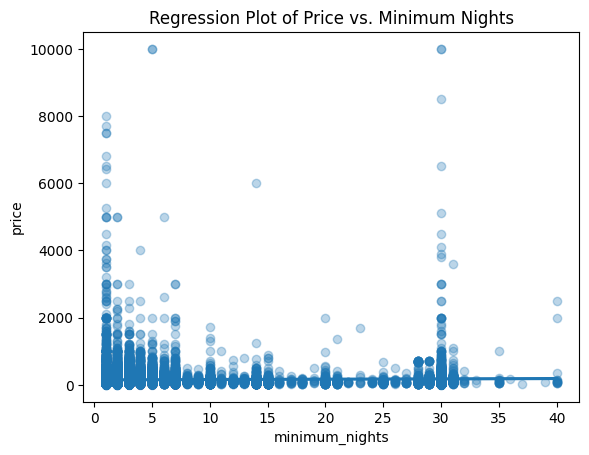

In [ ]:
sns.regplot(x='minimum_nights', y='price', data=data[data['minimum_nights'] <= 40], scatter_kws={'alpha':0.3})
plt.title('Regression Plot - Price vs. Minimum Nights')
plt.show()

there isn't a direct relationship between the minimum nights and its price

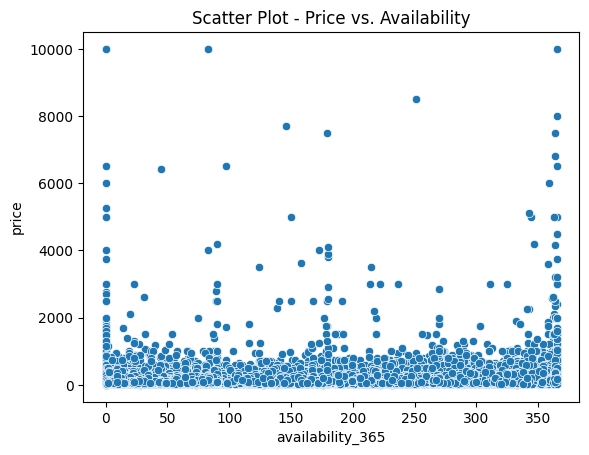

In [ ]:
sns.scatterplot(x='availability_365', y='price', data=data)
plt.title('Scatter Plot - Price vs. Availability')
plt.show()

the scatter plot does not show a strong linear correlation between the available days and price

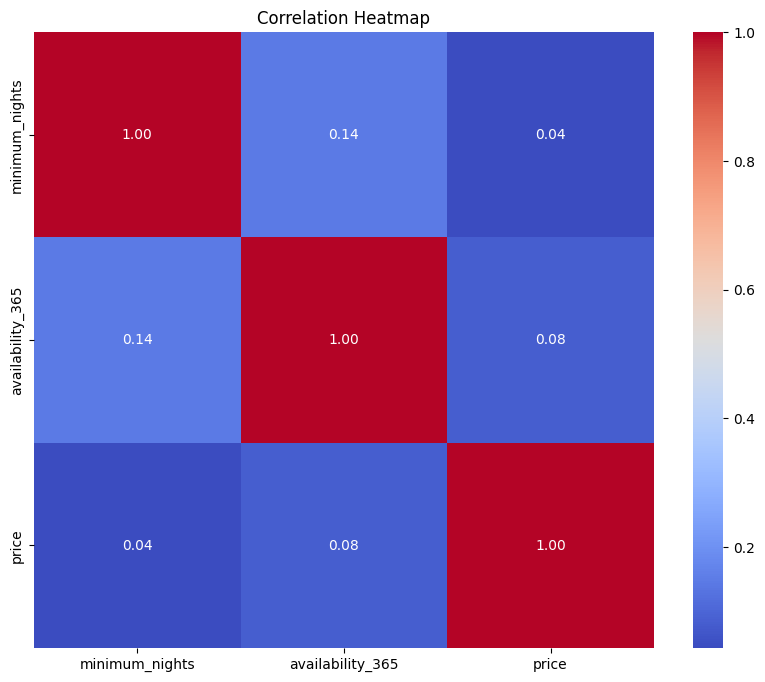

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['minimum_nights', 'availability_365', 'price']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

price is not strongly linearly dependent on either minimum_nights or availability_365

Analyzing Price and Area -- Jennie Liu

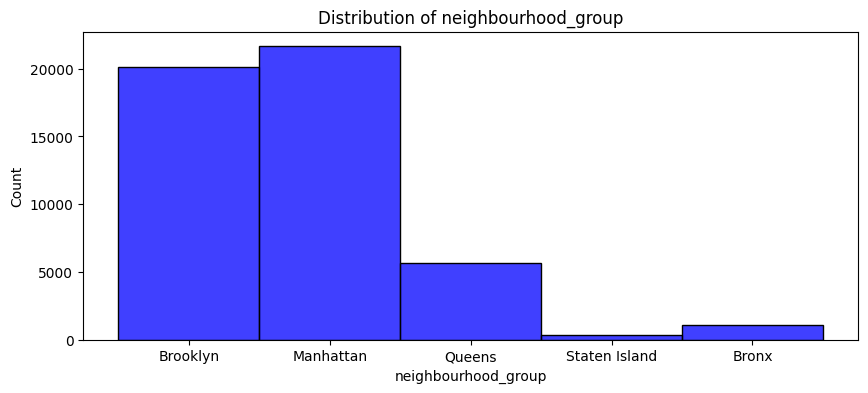

In [ ]:
# Jennie Liu
# Price
# area
# Analyzing distribution of area
plt.figure(figsize=(10,4))
sns.histplot(data['neighbourhood_group'], color="blue")
plt.title("Distribution of neighbourhood_group")
plt.show()

In [ ]:
duplicate_host_ids = data.duplicated('host_id', keep=False)

# Count the occurrences of each 'host_id' and filter for those appearing more than once
duplicate_counts = data['host_id'].value_counts()
duplicates_more_than_once = duplicate_counts[duplicate_counts > 1]

# Display the number of times each 'host_id' appears, for those that are duplicated
print(duplicates_more_than_once)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
1512462        2
279078         2
4119786        2
3772684        2
6754169        2
Name: count, Length: 5154, dtype: int64


In [ ]:
# Specific number of airbnb guests in each region
neighbourhood_group_count = data['neighbourhood_group'].value_counts()
print(neighbourhood_group_count)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


Based on the histgram graph, we can find most people who use Airbnb in NY will choose houses in Brooklyn or Manhataan. The specific number of people who choose houses in Manhattan is 21661, and number of people who choose houses in Brooklyn is 20104.

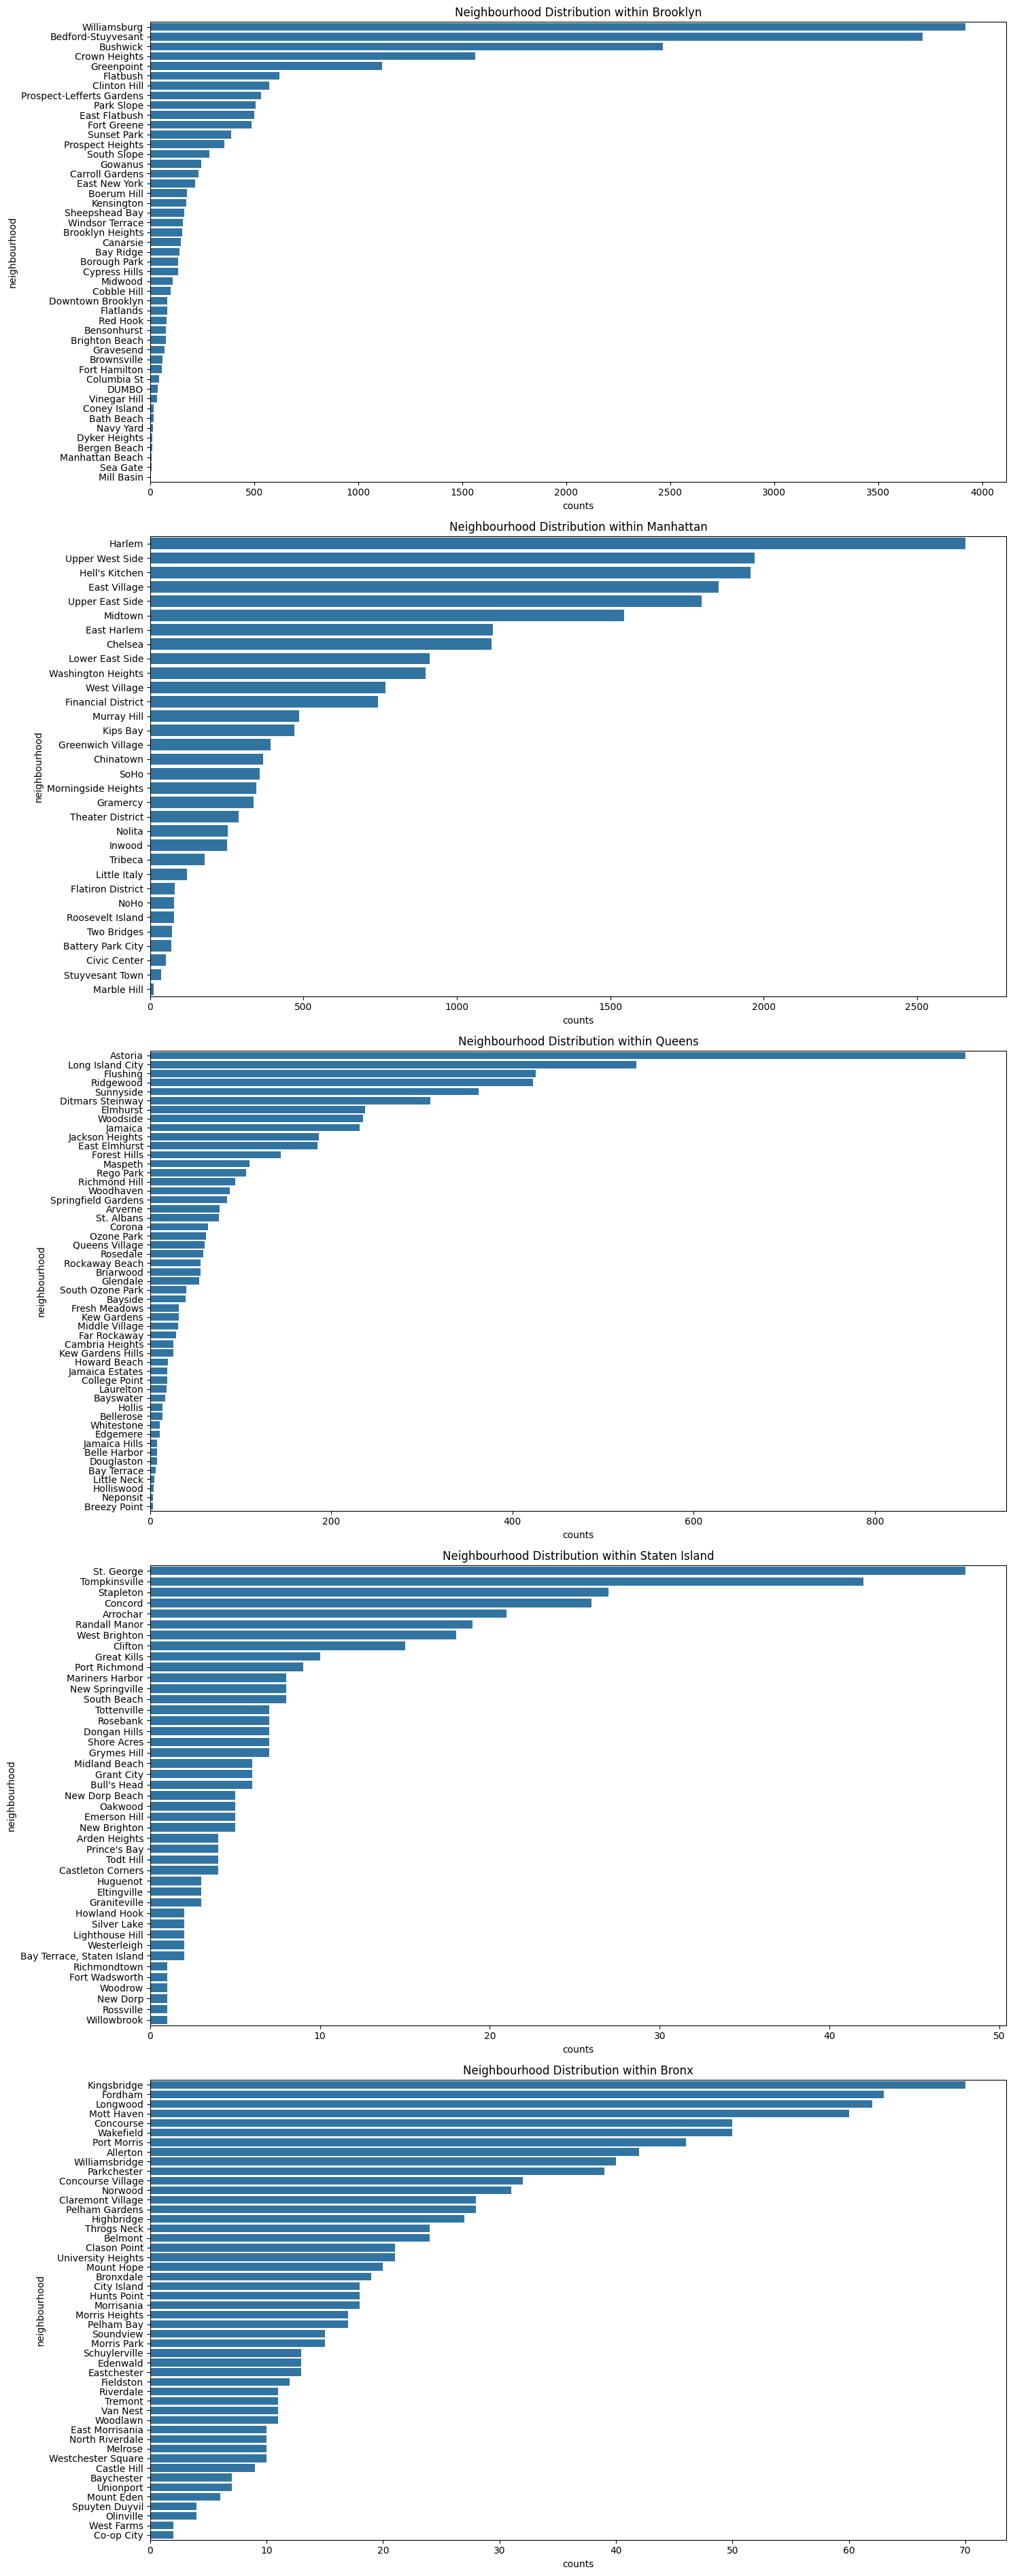

In [ ]:
# distribution of Neighbourhood Groups within each neighbourhood
neighbourhood_groups  = data['neighbourhood_group'].unique()
plt.figure(figsize=(15,38))
for i, group in enumerate(neighbourhood_groups, 1):
    plt.subplot(len(neighbourhood_groups), 1, i)
    # Filter the DataFrame for the current neighbourhood group
    subgroup = data[data['neighbourhood_group'] == group]
    # Get the value counts of neighbourhoods within this group
    counts = subgroup['neighbourhood'].value_counts().reset_index()
    counts.columns = ['neighbourhood', 'counts']
    # Create the plot
    sns.barplot(data=counts, x='counts', y='neighbourhood')
    plt.title(f'Neighbourhood Distribution within {group}')
    plt.tight_layout()

plt.show()

In [ ]:
# Group by 'neighbourhood_group' and 'neighbourhood', and count the listings
grouped_data = data.groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='counts')

# Now, for each 'neighbourhood_group', find the top 5 neighbourhoods by count
top_5_neighbourhoods = grouped_data.groupby('neighbourhood_group').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)
print(top_5_neighbourhoods)

   neighbourhood_group       neighbourhood  counts
0                Bronx         Kingsbridge      70
1                Bronx             Fordham      63
2                Bronx            Longwood      62
3                Bronx          Mott Haven      60
4                Bronx           Concourse      50
5             Brooklyn        Williamsburg    3920
6             Brooklyn  Bedford-Stuyvesant    3714
7             Brooklyn            Bushwick    2465
8             Brooklyn       Crown Heights    1564
9             Brooklyn          Greenpoint    1115
10           Manhattan              Harlem    2658
11           Manhattan     Upper West Side    1971
12           Manhattan      Hell's Kitchen    1958
13           Manhattan        East Village    1853
14           Manhattan     Upper East Side    1798
15              Queens             Astoria     900
16              Queens    Long Island City     537
17              Queens            Flushing     426
18              Queens         

Then I try to figure out the number of customers for areas in 5 regions. As we can see, most customers who choose Brooklyn houses located in Willamsburg and Bedford-Stuyvesant. The customers who choose Manhattan houses located inHarlem, Upper West side, Hell's kitchen, and midtown.

But we need more information to determine why customers will choose those area as living space. Price or convenient?

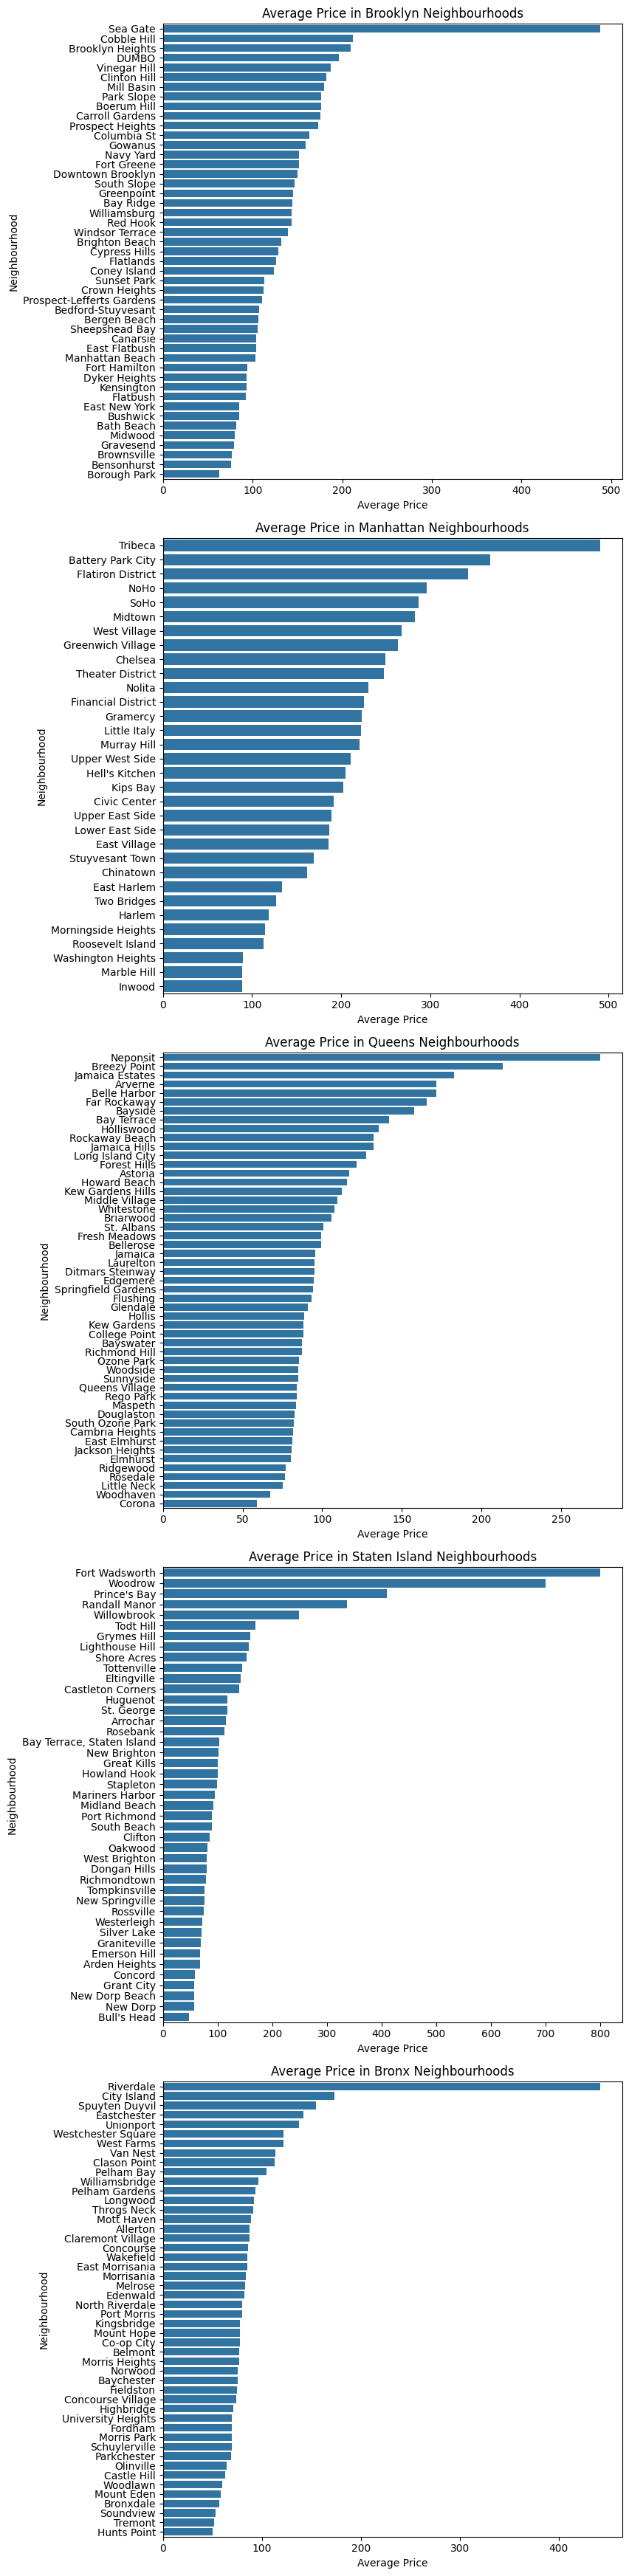

In [ ]:
# Average Price in each area
neighbourhood_groups = data['neighbourhood_group'].unique()

plt.figure(figsize=(15, 35))

for i, group in enumerate(neighbourhood_groups, 1):
    plt.subplot(len(neighbourhood_groups), 2, 2*i-1)  # Adjust subplot positioning for additional plots
    subgroup = data[data['neighbourhood_group'] == group]

    # Compute the average price for each neighbourhood within the current group
    avg_price = subgroup.groupby('neighbourhood')['price'].mean().reset_index()
    avg_price = avg_price.sort_values(by='price', ascending=False)  # Sort by average price for better visualization

    # Plot the average price
    sns.barplot(data=avg_price, x='price', y='neighbourhood')
    plt.title(f'Average Price in {group} Neighbourhoods')
    plt.xlabel('Average Price')
    plt.ylabel('Neighbourhood')

plt.tight_layout()
plt.show()

Here is the average price of each area: The highest house price in Brooklyn is Sea Gate, Willamsburg is mid price compared to other houses in Brooklyn. For Manhattan region, Harlem has cheaper house price than other areas so it may be a reason for customers choosing Harlem. And as we can see, even the houses in midterm is not cheaper, there are many people still choosing the house in this area. The reason is that Midterm is more convenient and close to Time Square.

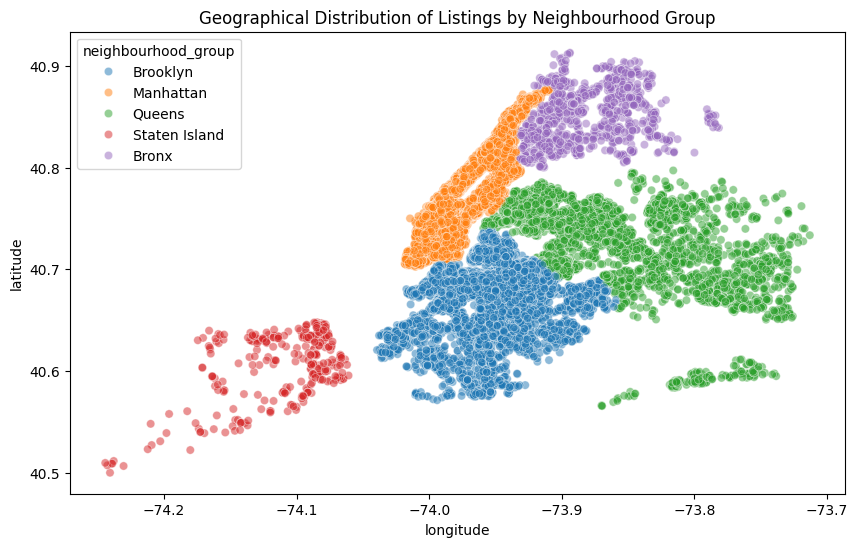

In [ ]:
# Visualization of Geographical Distribution of listings.
# using the longitude and latitude file give us

plt.figure(figsize= (10,6))
plt.title('Geographical Distribution of Listings by Neighbourhood Group')

sns.scatterplot(x = data.longitude, y = data.latitude,hue=data.neighbourhood_group, alpha = 0.5)
plt.show()

This is graph to showsing the density of Neighbourhood group.

2. Correlations between features


In [ ]:
# Correlation between price and area
data_new = pd.get_dummies(data, columns=['neighbourhood_group','neighbourhood'])
correlation_matrix = data_new.corr()
price_correlations = correlation_matrix['price'].filter(like='neighbourhood_group_').sort_values(ascending=False)
print(price_correlations)

<ipython-input-16-01b6405b10a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_new.corr()


neighbourhood_group_Manhattan        0.163976
neighbourhood_group_Staten Island   -0.013840
neighbourhood_group_Bronx           -0.041030
neighbourhood_group_Queens          -0.080205
neighbourhood_group_Brooklyn        -0.098603
Name: price, dtype: float64


Then we try to find correlation between price and area.


---


Manhattan_price correlation is 0.163976 which mean listings in Manhattan tend to be more expensive than in other neighbourhood groups, but the correlation is not very strong.

For other region, the correlation is negative. These values suggest that listings in Staten Island, Bronx, Queens, and Brooklyn tend to be less expensive than those in Manhattan.



In [ ]:
#distribution of reviews
#total(all kinds of room type)
plt.figure(figsize=(10, 6))
sns.histplot(data[data['number_of_reviews'] <= 100], x='number_of_reviews', binwidth=5, color='skyblue')
plt.title('Distribution of Number of Reviews (all kinds of room type)')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 24001, 2000))


plt.show()

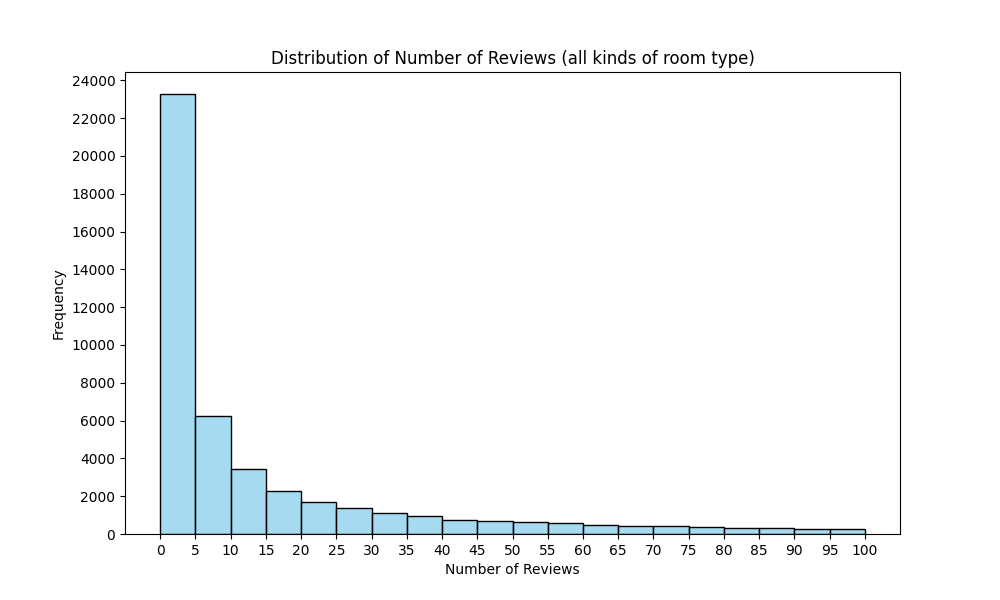

In [ ]:
#distribution by different room types(private)
private_room_data = data[data['room_type'] == 'Private room']

plt.figure(figsize=(10, 6))
sns.histplot(data=private_room_data, x='number_of_reviews', binwidth=10)
plt.title('Distribution of Number of Reviews for Private Room')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 501, 50))
plt.yticks(np.arange(0, 15001, 1000))

plt.show()

In [ ]:
#distribution by different room types(shared)
shared_room_data = data[data['room_type'] == 'Shared room']

plt.figure(figsize=(10, 6))
sns.histplot(data=shared_room_data, x='number_of_reviews', binwidth=10)
plt.title('Distribution of Number of Reviews for Shared Room')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 501, 50))
plt.yticks(np.arange(0, 15001, 1000))

plt.show()

In [ ]:
#distribution by different room types(Entire/apt)
entire_home_data = data[data['room_type'] == 'Entire home/apt']

plt.figure(figsize=(10, 6))
sns.histplot(data=entire_home_data, x='number_of_reviews', binwidth=10)
plt.title('Distribution of Number of Reviews for Entire Home/Apt')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 501, 50))
plt.yticks(np.arange(0, 15001, 1000))

plt.show()

In [ ]:
#pi_diagram_distribution
room_type_reviews = data.groupby('room_type')['number_of_reviews'].sum()
plt.figure(figsize=(8, 8))
plt.pie(room_type_reviews, labels=room_type_reviews.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'yellow'])
plt.title('Distribution of Reviews by Room Type')

plt.show()


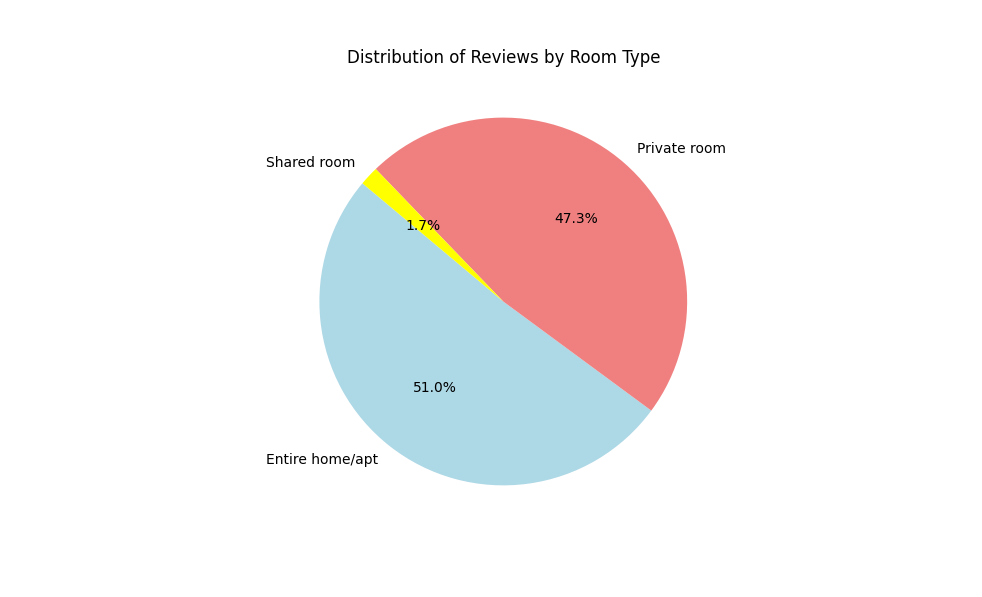

In [ ]:
#review_price
reviews = df['reviews_per_month']
prices = df['price']

plt.figure(figsize=(10, 6))
plt.scatter(reviews, prices, alpha=0.5)
plt.title('Relation between Reviews(per month) and Prices')
plt.xlabel('Reviews per month')
plt.ylabel('Price')
plt.grid(True)

plt.xticks(range(0, int(max(reviews)) + 1, 5))
plt.yticks(range(0, int(max(prices)) + 1, 1000))

plt.show()

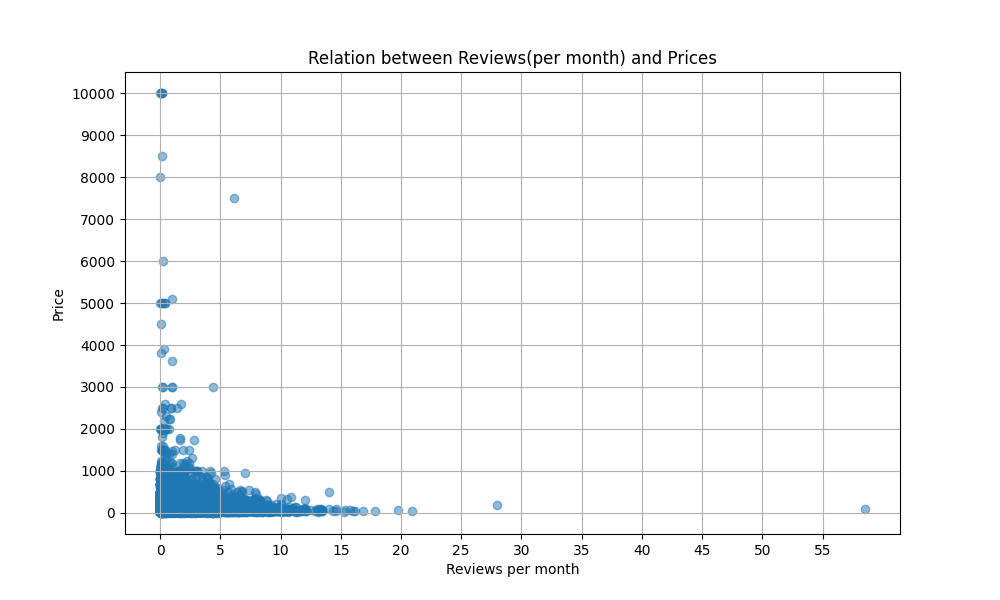

<Axes: >

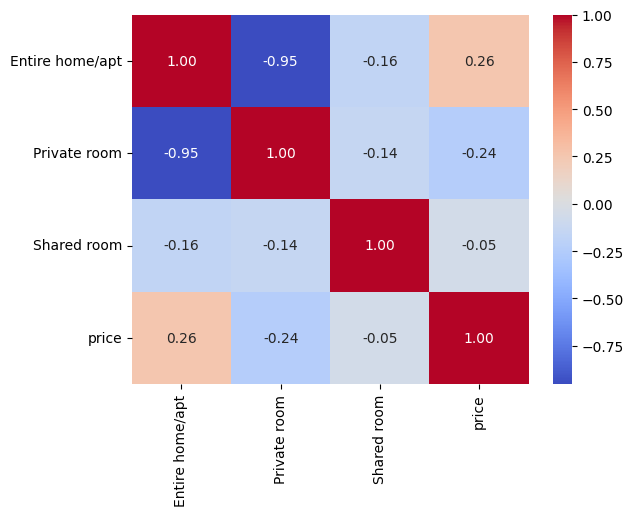

In [ ]:
room_type = pd.get_dummies(data['room_type'])
room_type['price'] = data['price']
room_type_corr = room_type.corr()
sns.heatmap(room_type_corr, annot = True, fmt='.2f', cmap='coolwarm')

The negative correlation between Entire home/apt, private room and shared room is natural, since they are no overlap categories.
The positive correlation between Entire home/apt and price indicates the prices for entire home/apt is higher, while the nagative correlation between private rooms/ shared rooms and prices suggests they are less expensive than entire home/apts. This is reasonal because entire home/apt usually have larger space, better privacy and less disturb from others.

<Axes: xlabel='room_type'>

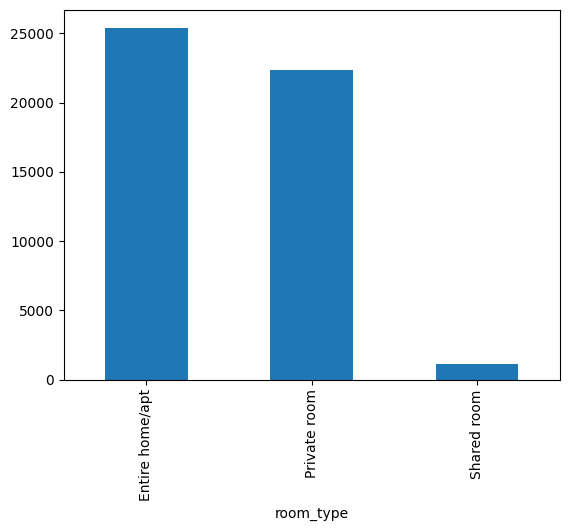

In [ ]:
roomdata = data.groupby('room_type')['room_type'].count()
roomdata.plot(kind="bar")

<Axes: xlabel='neighbourhood_group'>

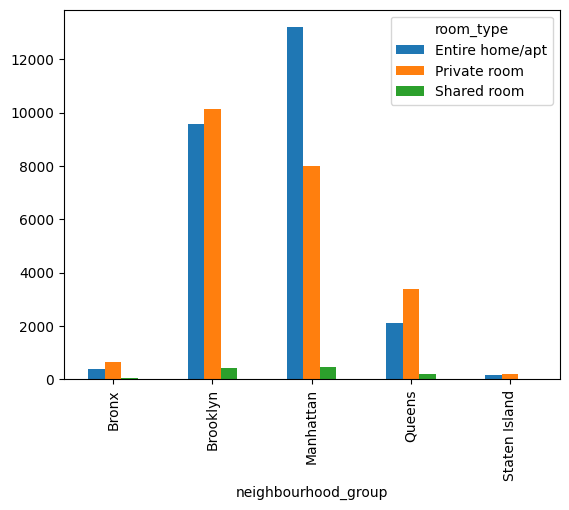

In [ ]:
room_by_loc = data.groupby(by=['neighbourhood_group', 'room_type']).count()
room_count_by_loc = room_by_loc['id'].unstack()
room_count_by_loc.plot(kind = 'bar')

In [ ]:
files.upload()
NYCmap = plt.imread("New_York_City_.png", ".png")

Saving New_York_City_.png to New_York_City_ (3).png


Saving New_York_City_.png to New_York_City_ (7).png


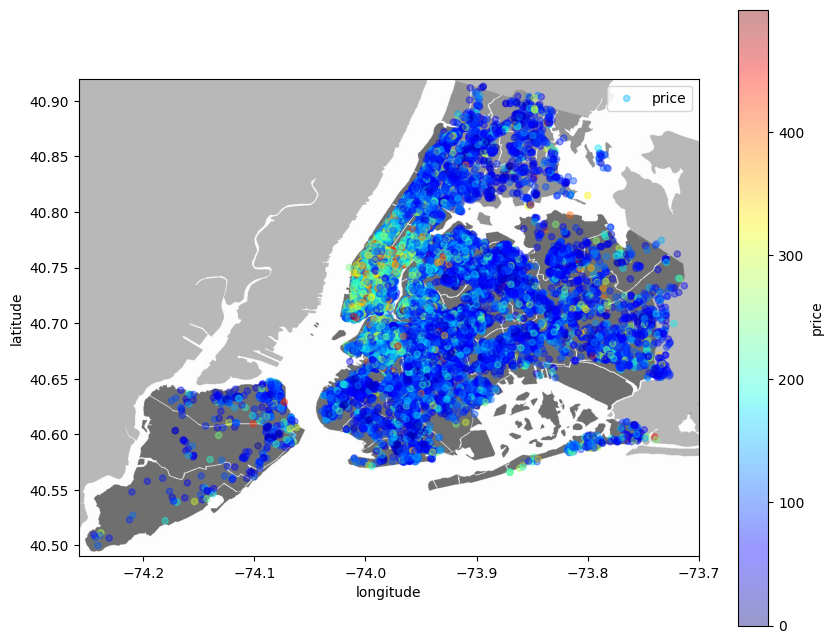

In [ ]:
plt.figure(figsize=(10,8))
files.upload()
NYCmap = plt.imread("New_York_City_.png", ".png")
plt.imshow(NYCmap,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sub_6=data[data.price < 500]
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='price', c='price', ax=ax,
     cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()
#plt.imshow(NYCmap, cmap=plt.cm.binary)

## Lasso regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data exploration and preprocessing
# Checking for missing values
data.isnull().sum()

# Fill missing 'name' and 'host_name' with 'Unknown'
data['name'].fillna('Unknown', inplace=True)
data['host_name'].fillna('Unknown', inplace=True)

# For 'last_review', fill it with a placeholder date or drop it
data['last_review'].fillna('2019-01-01', inplace=True)  # Placeholder date

# For 'reviews_per_month', fill missing values with 0
data['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
import pandas as pd
# Date preprocessing for 'last_review'
data['last_review'] = pd.to_datetime(data['last_review'])
data['days_since_last_review'] = (pd.to_datetime('today') - data['last_review']).dt.days
features = ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights',
            'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'reviews_per_month']
target = 'price'
# Assuming `df` is your DataFrame containing all the data
df_encoded = pd.get_dummies(data[features + [target]], drop_first=True)

X = df_encoded.drop(target, axis=1)  # Features
y = df_encoded[target]               # Target variable

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data set
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test data set
X_test_scaled = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with an alpha value.
lasso = Lasso(alpha=1)  # The alpha value can be tuned via cross-validation.

# Fit the model on the scaled training data
lasso.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = lasso.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 38870.08439011277
R^2 Score: 0.12134645900702279


# Try to find the reason making MSE too high:


1.   The features selected and how they are encoded might not capture enough variability of the price
2.   Significant outliers can skew the results, disproportionately affecting the MSE
3.   Both Lasso and Ridge regressions may be too simplistic to capture complex relationships. Try models that can capture non-linear patterns, like tree-based models (Random Forest, Gradient Boosting), or consider adding interaction terms.



Optimal Alpha: 0.352893255884436
Mean Squared Error: 38876.75148659713
R^2 Score: 0.12119575010000494
Cross-validated MSE: 0.25031586782036974


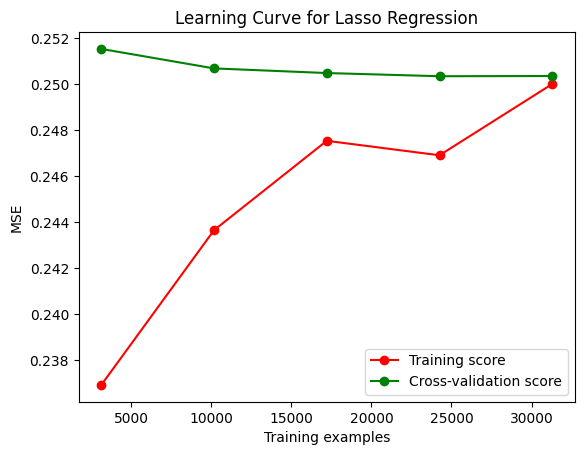

In [ ]:
from sklearn.linear_model import LassoCV

# Using LassoCV to find the optimal alpha and fit the model
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

# Evaluating the model with the selected alpha
print(f"Optimal Alpha: {lasso_cv.alpha_}")
y_pred_test = lasso_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
y_train_log = np.log1p(y_train)  # Use log1p for log(1+x) to handle zero values gracefully
y_test_log = np.log1p(y_test)

# Fit the model on the transformed data
lasso_cv.fit(X_train_scaled, y_train_log)
y_pred_test_log = lasso_cv.predict(X_test_scaled)
y_pred_test = np.expm1(y_pred_test_log)  # Convert back to the original scale

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Evaluate using cross-validation
scores = cross_val_score(lasso_cv, X_train_scaled, y_train_log, scoring='neg_mean_squared_error', cv=10)
print("Cross-validated MSE:", np.mean(np.abs(scores)))

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(lasso_cv, X_train_scaled, y_train_log, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve for Lasso Regression')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.show()




1.Plot learning curves to determine if the model is suffering from high bias (underfitting) or high variance (overfitting). This can guide whether adding more data, reducing model complexity, or increasing model complexity might help.

2.Use a more robust cross-validation method to ensure that the model is not just failing on a particular subset of the data. k-fold cross-validation or repeated random sub-sampling validation can provide more insight into the model's performance across different data splits.






### Ridge Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV  # Import RidgeCV here
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Define a range of alpha values for Ridge Regression
alphas = np.logspace(-6, 6, 13)

# Initialize RidgeCV with the alpha values and cross-validation settings
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the RidgeCV model to the scaled training data
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        store_cv_values=True)

Optimal Alpha: 100.0
Mean Squared Error: 38885.80177705385
R^2 Score: 0.12099116938242782


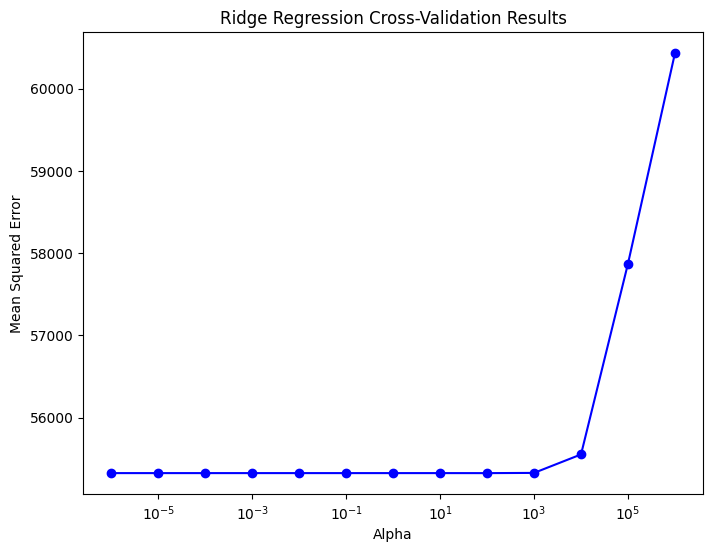

In [ ]:
# Predict and evaluate
y_pred = ridge_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Optimal Alpha: {ridge_cv.alpha_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optionally, plot the MSE for different alpha values
mean_mse = np.mean(ridge_cv.cv_values_, axis=0)
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_mse, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Cross-Validation Results')
plt.xscale('log')
plt.show()